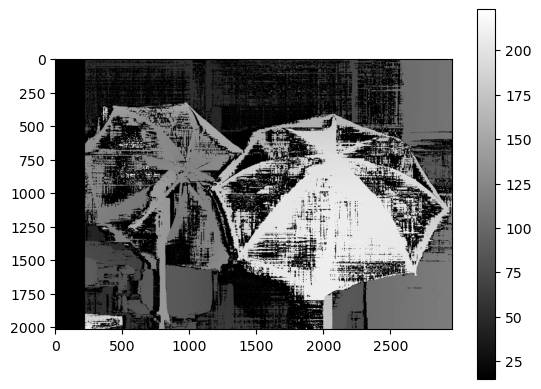

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

class DepthMap: 
    def __init__(self,showImages): 
        # Load Images 
        self.imgLeft = cv.imread('im0.png',cv.IMREAD_GRAYSCALE) 
        self.imgRight = cv.imread('im1.png',cv.IMREAD_GRAYSCALE) 

        if showImages: 
            plt.figure() 
            plt.subplot(121)
            plt.imshow(self.imgLeft)
            plt.subplot(122)
            plt.imshow(self.imgRight)
            plt.show() 

    def computeDepthMapBM(self):
        nDispFactor = 12 # adjust this 
        stereo = cv.StereoBM.create(numDisparities=16*nDispFactor, blockSize=21)
        disparity = stereo.compute(self.imgLeft,self.imgRight)
        plt.imshow(disparity,'gray')
        plt.show()

    def computeDepthMapSGBM(self): 
        window_size = 7
        min_disp = 16
        nDispFactor = 14 # adjust this (14 is good)
        num_disp = 16*nDispFactor-min_disp

        stereo = cv.StereoSGBM_create(minDisparity=min_disp,
                                    numDisparities=num_disp,
                                    blockSize=window_size,
                                    P1=8*3*window_size**2,
                                    P2=32*3*window_size**2,
                                    disp12MaxDiff=1,
                                    uniquenessRatio=15,
                                    speckleWindowSize=0,
                                    speckleRange=2,
                                    preFilterCap=63,
                                    mode=cv.STEREO_SGBM_MODE_SGBM_3WAY)

        # Compute disparity map
        disparity = stereo.compute(self.imgLeft,self.imgRight).astype(np.float32) / 16.0

        # Display the disparity map
        plt.imshow(disparity, 'gray')
        plt.colorbar()
        plt.show()

def demoViewPics():
    # See pictures 
    dp = DepthMap(showImages=True) 

def demoStereoBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapBM()

def demoStereoSGBM(): 
    dp = DepthMap(showImages=False)
    dp.computeDepthMapSGBM()

if __name__ == '__main__': 
    # demoViewPics()
    # demoStereoBM()
    demoStereoSGBM() 